# Image processing

### Example: Satellite image

https://www.meteoblue.com/en/country/weather/satellite/ecuador_ecuador_3658394

Download image from:

https://github.com/wbandabarragan/physics-teaching-data/blob/main/2D-data/Satellite-No-Radar_20220621T20220621_1115.jpeg

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from skimage import io

In [3]:
image = io.imread("./Satellite-No-Radar_20220621T20220621_1115.jpeg")

print(type(image))

print(image.shape)

print(np.max(image), np.min(image))

<class 'numpy.ndarray'>
(1074, 1480, 3)
255 0


In [5]:
image = io.imread("./Satellite-No-Radar_20220621T20220621_1115.jpeg", as_gray = True)

print(type(image))

#print(image)
print(np.max(image), np.min(image))

<class 'numpy.ndarray'>
1.0 0.0


In [6]:
print(image.shape)

(1074, 1480)


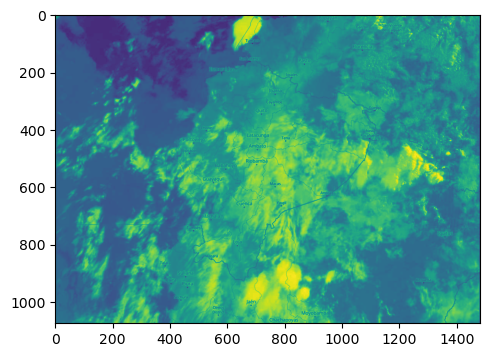

In [7]:
fig, ax = plt.subplots(figsize=(6,4))

ax.imshow(image, cmap = "viridis")

plt.show()

## Edge detection with scikit


We need filters. skimage.filters: roberts, sobel

# The Roberts cross operator

It is a differential operator.

It approximates the gradient of an image through discrete differentiation.

Differentiation is achieved by computing the sum of the squares of the differences between diagonally adjacent pixels.


$y_{i,j} = \sqrt{x_{i,j}}$, where $x$ is the initial intensity value in the image.

$z_{i,j} = \sqrt{(y_{i,j} - y_{i+1,j+1})^2 + (y_{i+1,j} - y_{i, j+1})^2}$, where $z$ is the computed derivative and i,j represent the location in the image.

We carry out a convolution of the original image with the following two kernels: 

\begin{bmatrix} 
+1 & 0 \\
 0 & -1\\
\end{bmatrix}

\begin{bmatrix} 
0  & +1 \\
-1 & 0  \\
\end{bmatrix}.

Let $I(x,y)$ be a point in the original image and $G_x(x,y)$ be a point in an image formed by convolving with the first kernel and $G_y(x,y)$ be a point in an image formed by convolving with the second kernel. Remenber that a convolution is an function of this type:

$(f * g)(t) := \int_{-\infty}^\infty f(\tau) g(t - \tau) \, d\tau$, which expresses how the shape of one function is modified by the other. 


The gradient can then be defined as:

$\nabla I(x,y) = G(x,y) = \sqrt{ G_x^2 + G_y^2 }$

The direction of the gradient can also be defined as follows:


$\Theta(x,y) = \arctan{\left(\frac{G_y(x,y)}{G_x(x,y)}\right)} - \frac{3\pi}{4}$

Note that angle of 0° corresponds to a vertical orientation such that the direction of maximum contrast from black to white runs from left to right on the image.

Reference: https://en.wikipedia.org/wiki/Roberts_cross

Code: https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.roberts


### Example:

Download image from: https://github.com/wbandabarragan/physics-teaching-data/blob/main/2D-data/Bikesgray.jpg

In [8]:
test_im = io.imread("./Bikesgray.jpg", as_gray = True)

print(test_im.shape)

(480, 640)


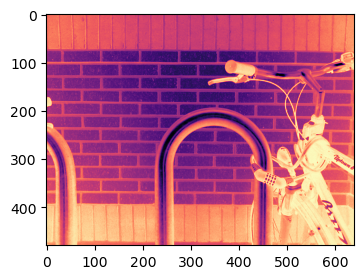

In [10]:
fig, ax = plt.subplots(figsize = (4,3))
ax.imshow(test_im, cmap = 'magma_r')
plt.show()

In [11]:
from skimage.filters import roberts, sobel

In [12]:
edge_test_im = roberts(test_im)

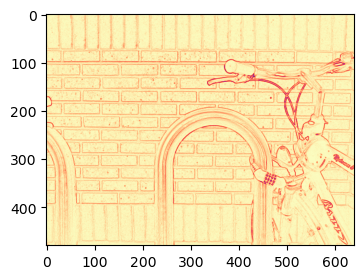

In [13]:
fig, ax = plt.subplots(figsize = (4,3))

ax.imshow(edge_test_im, cmap = 'magma_r')

plt.show()

### Back to our exercise:

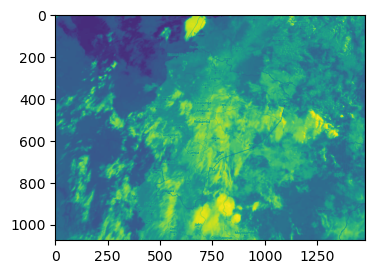

In [23]:
fig, ax = plt.subplots(figsize=(4,3))

ax.imshow(image)

plt.show()

In [15]:
# Applying the Roberts cross op.

edge_filtered_image1 = roberts(image)

In [16]:
print(np.max(image), np.min(image))

1.0 0.0


In [17]:
print(np.max(edge_filtered_image1), np.min(edge_filtered_image1))

0.952978274059151 0.0


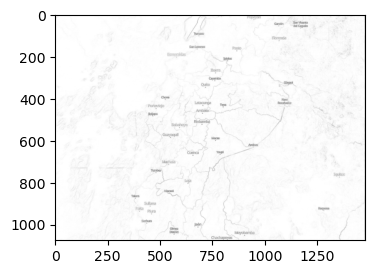

In [18]:
fig, ax = plt.subplots(figsize=(4,3))

ax.imshow(edge_filtered_image1, cmap= 'gray_r')

plt.show()

# The Sobel operator

It creates an image emphasising edges.


It is a discrete differentiation operator.


It computes an approximation of the gradient of the image intensity function. At each point in the image, the result is either the corresponding gradient vector or the norm of this vector.


It is based on convolving the image with a small, separable, and integer-valued filter in the horizontal and vertical directions.


The operator convolves two $3\times 3$ kernels which with the original image to calculate approximations of the image derivatives, one for horizontal changes, and one for vertical.


If we define $A$ as the source image, and $G_x$ and $G_y$ are two images which at each point contain the horizontal and vertical derivative approximations respectively, the computations are as follows:

\begin{bmatrix} 
+1 & 0 & -1  \\
+2 & 0 & -2 \\
+1 & 0 & -1 
\end{bmatrix}

\begin{bmatrix} 
+1 & +2 & +1\\
 0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix}


where * here denotes the 2-dimensional signal processing convolution operation.

Since the Sobel kernels can be decomposed as the products of an averaging and a differentiation
kernel, they compute the gradient with smoothing. For example, ${G}_x$ can be written as

At each point in the image, the resulting gradient approximations can be combined to give the gradient magnitude, using:
$\mathbf{G} = \sqrt{ {\mathbf{G}_x}^2 + {\mathbf{G}_y}^2 }$

Using this information, we can also calculate the gradient's direction:

$\mathbf{\Theta} = \operatorname{atan2}( \mathbf{G}_y , \mathbf{G}_x )$

where, for example, $\Theta$ is $0$ for a vertical edge which is lighter on the right side (for the 2-argument arctangent, $\operatorname{atan2}$).


Reference: https://en.wikipedia.org/wiki/Sobel_operator

Code: https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.sobel



### Example: 

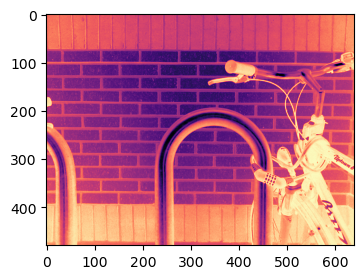

In [19]:
fig, ax = plt.subplots(figsize = (4,3))
ax.imshow(test_im, cmap = 'magma_r')
plt.show()

In [20]:
# Applyingthe Sobel op.

edge_test_im2 = sobel(test_im)

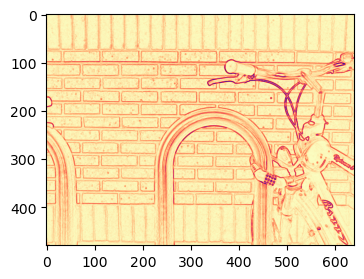

In [21]:
fig, ax = plt.subplots(figsize = (4,3))
ax.imshow(edge_test_im2, cmap = 'magma_r')
plt.show()

Text(0.5, 1.0, 'Sobel')

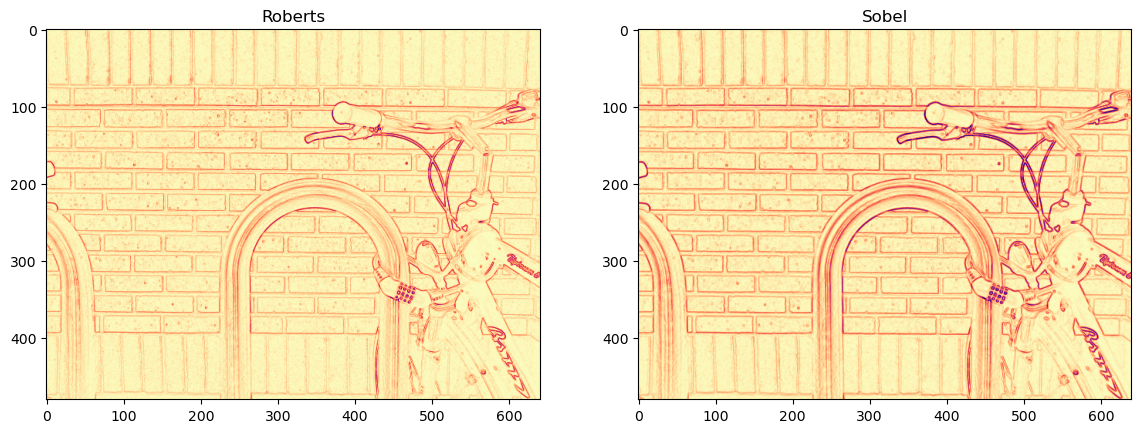

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,10))
ax1.imshow(edge_test_im, cmap = 'magma_r')
ax1.set_title("Roberts")
ax2.imshow(edge_test_im2, cmap = 'magma_r')
ax2.set_title("Sobel")

### Back to our exercise:

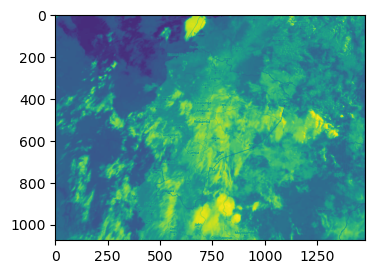

In [24]:
fig, ax = plt.subplots(figsize=(4,3))

ax.imshow(image)

plt.show()

In [25]:
edge_filtered_image2 = sobel(image)

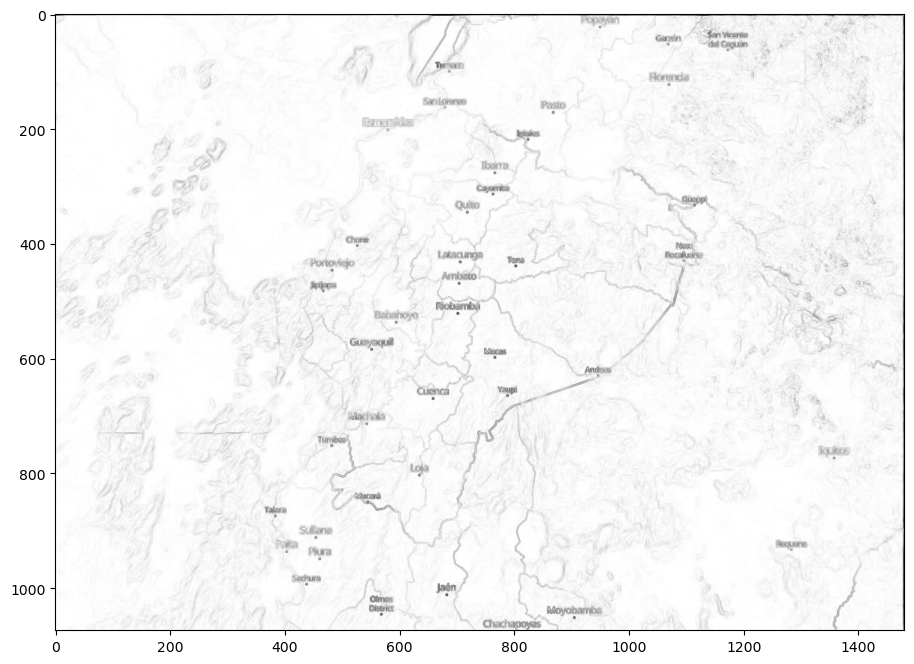

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(edge_filtered_image2, cmap= 'gray_r')
plt.show()

Text(0.5, 1.0, 'Sobel')

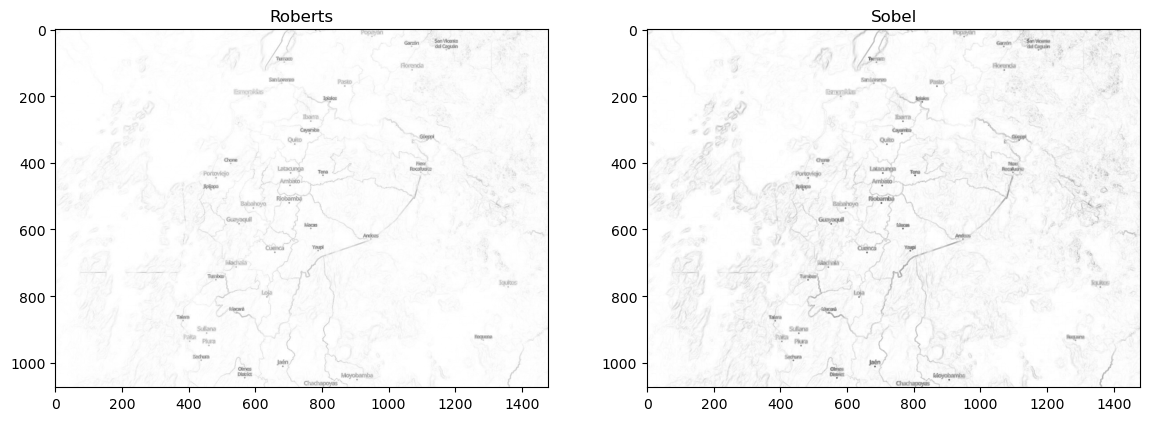

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,10))
ax1.imshow(edge_filtered_image1, cmap = 'gray_r')
ax1.set_title("Roberts")
ax2.imshow(edge_filtered_image2, cmap = 'gray_r')
ax2.set_title("Sobel")

# The canny edge detector

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images.

The process of Canny edge detection algorithm can be broken down to five different steps:

1. Apply Gaussian filter to smooth the image in order to remove the noise

$H_{ij}= \frac{1}{2\pi\sigma^2}\exp \left(-\frac{(i-(k+1))^2+(j-(k+1))^2}{2\sigma^2} \right) ; 1 \leq i, j \leq (2k + 1$


2. Find the intensity gradients of the image $\frac{1}{159}\times$

\begin{bmatrix} 
2 & 4 & 5 & 4 & 2 \\
4 & 9 & 12 & 9 & 4 \\
5 & 12 & 15 & 12 & 5 \\
4 & 9 & 12 & 9 & 4 \\
2 & 4 & 5 & 4 & 2
\end{bmatrix}


3. Apply gradient magnitude thresholding or lower bound cut-off suppression to get rid of spurious response to edge detection. An edge in an image may point in a variety of directions, so the Canny algorithm uses four filters to detect horizontal, vertical and diagonal edges in the blurred image.

$\mathbf{G} = \sqrt{ {\mathbf{G}_x}^2 + {\mathbf{G}_y}^2 }$

$\mathbf{\Theta} = \operatorname{atan2}\left(\mathbf{G}_y, \mathbf{G}_x\right)$.


4. Apply double threshold to determine potential edges

- The edge direction angle is rounded to one of four angles representing vertical, horizontal, and the two diagonals (0°, 45°, 90°, and 135°). An edge direction falling in each color region will be set to a specific angle value, for instance, θ in [0°, 22.5°] or [157.5°, 180°] maps to 0°.


5. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges. (Hysteresis refers to the dependence of the state of a system on its history).


### Gaussian smoothing:

In [28]:
from scipy.ndimage import gaussian_filter

In [29]:
AA = np.arange(100, step=1).reshape((10,10))
print(AA)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


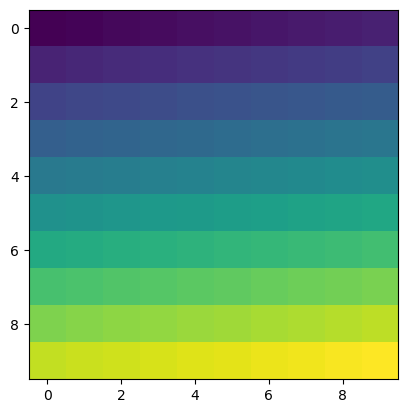

In [30]:
plt.imshow(AA)

In [32]:
BB = gaussian_filter(AA, sigma=1)

print(BB)

[[ 4  5  6  7  8  9  9 10 11 12]
 [10 11 12 13 14 15 15 16 17 18]
 [20 21 22 23 24 25 25 26 27 28]
 [30 31 32 33 34 35 35 36 37 38]
 [40 41 42 43 44 45 45 46 47 48]
 [50 51 52 53 54 55 55 56 57 58]
 [59 60 61 62 63 64 64 65 66 67]
 [69 70 71 72 73 74 74 75 76 77]
 [79 80 81 82 83 84 84 85 86 87]
 [85 86 87 88 89 90 90 91 92 93]]


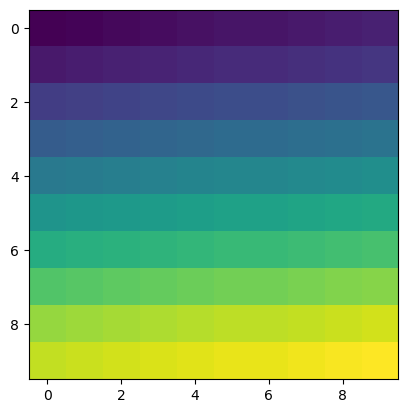

In [33]:
plt.imshow(BB)

In [34]:
# Results of smoothing

print(np.max(AA), np.min(AA))
print(np.max(BB), np.min(BB))

99 0
93 4


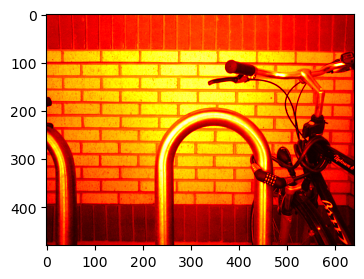

In [36]:
fig, ax = plt.subplots(figsize = (4,3))
ax.imshow(test_im, cmap = 'hot')
plt.show()

In [39]:
test_im_smoothed = gaussian_filter(test_im, sigma=2.)

Text(0.5, 1.0, 'Smoothed')

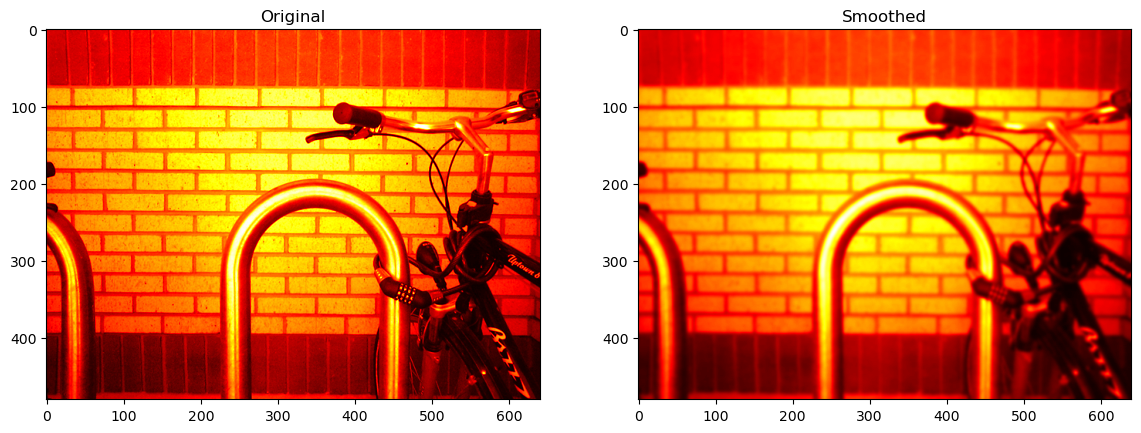

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,10))
ax1.imshow(test_im, cmap = 'hot')
ax1.set_title("Original")
ax2.imshow(test_im_smoothed, cmap = 'hot')
ax2.set_title("Smoothed")

In [41]:
test_im_1D = test_im.reshape(test_im.size,1)
test_im_smoothed_1D = test_im_smoothed.reshape(test_im.size,1)

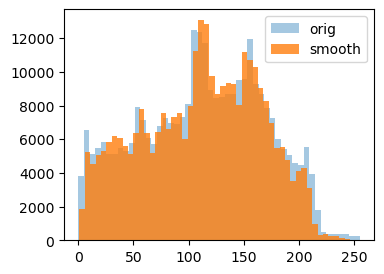

In [46]:
plt.figure(figsize=(4,3))
plt.hist(test_im_1D, bins = 50, alpha = 0.4, label = "orig")
plt.hist(test_im_smoothed_1D, bins = 50, alpha = 0.8, label = "smooth")
plt.legend()
plt.show()

### Back to Canny:

In [47]:
from skimage.feature import canny

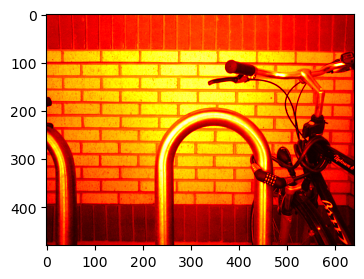

In [48]:
fig, ax = plt.subplots(figsize = (4,3))
ax.imshow(test_im, cmap = 'hot')
plt.show()

In [59]:
edge_test_im3 = canny(test_im, sigma = 2.)

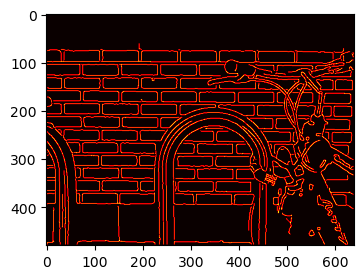

In [60]:
fig, ax = plt.subplots(figsize = (4,3))
ax.imshow(edge_test_im3, cmap = 'hot')
plt.show()

Text(0.5, 1.0, 'Canny')

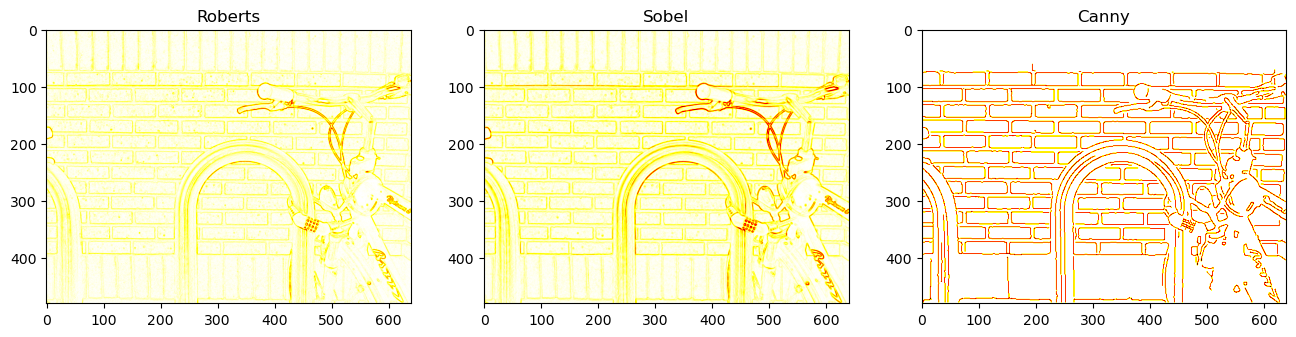

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16,8))
ax1.imshow(edge_test_im, cmap = 'hot_r')
ax1.set_title("Roberts")

ax2.imshow(edge_test_im2, cmap = 'hot_r')
ax2.set_title("Sobel")

ax3.imshow(edge_test_im3, cmap = 'hot_r')
ax3.set_title("Canny")

### Back to our exercise:

In [66]:
edge_canny = canny(image, sigma = 2.)

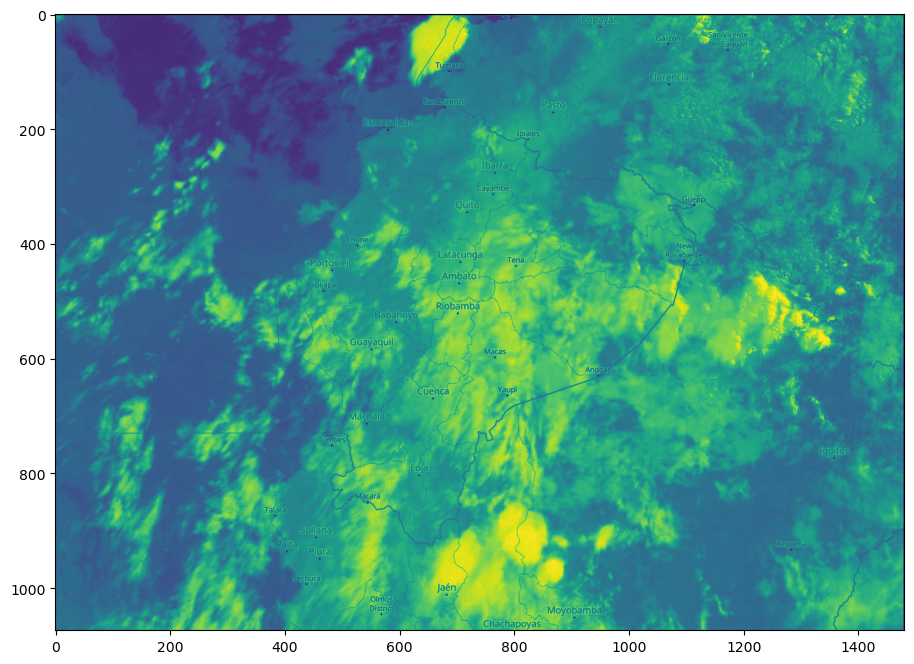

In [67]:
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(image, cmap= 'viridis')
plt.show()

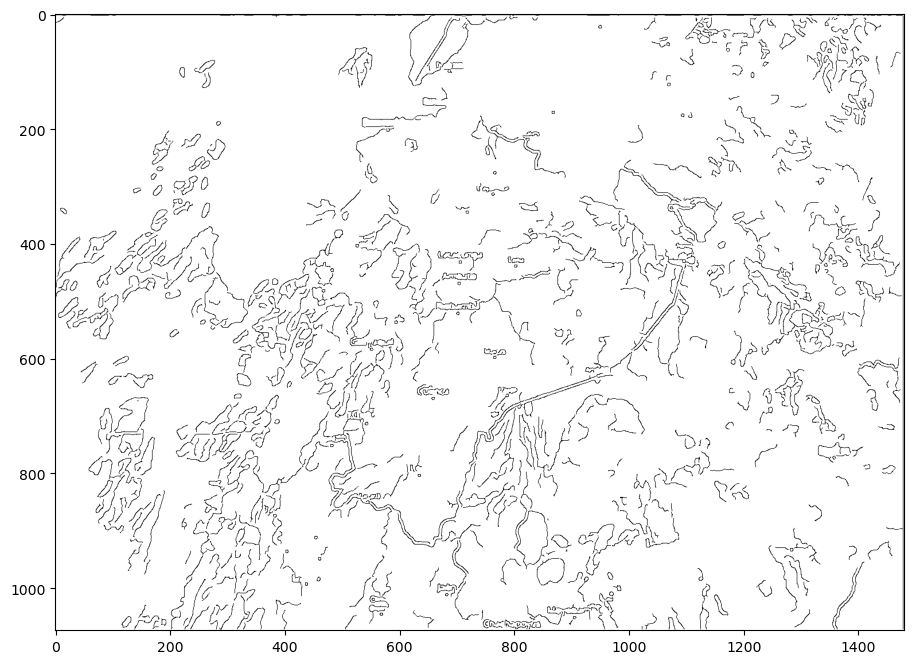

In [68]:
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(edge_canny, cmap= 'gray_r')
plt.show()